
![equation](http://www.sciweavers.org/upload/Tex2Img_1647583658/render.png)

Сделать картинки
http://www.sciweavers.org/free-online-latex-equation-editor

Пишем все

# Model definition

In [23]:
import time
import numpy as np
import random
import matplotlib.pyplot as plt

In [62]:
def print_metrix(parameters, avg_t_t, lost_cust_p, waiting_cust_p, avg_len, wasted_t_p):
    _, axs = plt.subplots(3, 2,figsize=(15,10))

    axs[0][0].plot(parameters, avg_t_t)
    axs[0][0].set_title('Среднее время нахождения в очереди')

    axs[0][1].plot(parameters, lost_cust_p)
    axs[0][1].set_title('Вероятность отказа')

    axs[1][0].plot(parameters, waiting_cust_p)
    axs[1][0].set_title('Вероятность ожидания')

    axs[1][1].plot(parameters, avg_len)
    axs[1][1].set_title('Средняя длина очереди')

    axs[2][0].plot(parameters, wasted_t_p)
    axs[2][0].set_title('Вероятность простоя системы')

In [24]:
def get_next_time(param):
    s = 0
    while s == 0:
        # Interval between arrivals averaging (1/param) seconds
        s = random.expovariate(param)
    return s


def MM1Ksimulation(capacity = 1, lmbd:float = 1, mu:float = 1, timeout = 1):
    assert capacity, "Max length of queue should be greater than 0"
    assert lmbd > 0 and mu > 0, "Your model parameters lambda and mu should be greater than 0"
    assert timeout, "Your experiment time should be greater than 0"

    queue, arrival_time, departure_time, num_in_q, waiting_time, wasted_time = [], [], [], [], [], []
    total_customers, lost_customers, total_served, waiting_customers = 0, 0, 0, 0

    # Compute time of next arrival.
    nextArrival = get_next_time(lmbd)

    # TODO(HabKaffee): входной поток - пуассоновский, задержка между приходами и сорвисом - экспонента ???

    # Compute time of next completed service.
    nextService = nextArrival + get_next_time(mu)

    # Simulate the M/M/1 queue.
    timeout_start = time.time() 
    while time.time() < timeout_start + timeout:
        # Next event is an arrival.
        while nextArrival < nextService:
            # Simulate an arrival
            if len(queue) < capacity:
                queue.append(nextArrival)
                arrival_time.append(nextArrival)
                total_customers += 1
                num_in_q.append(len(queue))
                if(len(queue)):
                    waiting_customers += 1      
            else:
                lost_customers  += 1
                total_customers += 1
            nextArrival += get_next_time(lmbd)

        # Next event is a service completion.
        arrival = queue.pop(0)
        total_served += 1
        departure_time.append(nextService)
        waiting_time.append(nextService - arrival)
        num_in_q.append(len(queue))

        # Update the queue.
        if not queue:
            nextService = nextArrival + get_next_time(mu)
        else:
            nextService = nextService + get_next_time(mu)
    num_of_customers = len(arrival_time)
    arrival_time = arrival_time[:len(departure_time)]
    
    for i in range(1, len(departure_time)):
        if ((arrival_time[i]-departure_time[i-1])>0):
            wasted_time.append(arrival_time[i]-departure_time[i-1])
    return      np.mean(waiting_time),              \
                lost_customers/total_customers,     \
                waiting_customers/num_of_customers, \
                np.mean(num_in_q),                  \
                sum(wasted_time)/departure_time[-1]

Just use

In [28]:
avg_total_time,         \
lost_customers_prob,    \
waiting_customers_prob, \
avg_num_in_q,           \
wasted_time_prob        = MM1Ksimulation(capacity = 250, lmbd = 1/99, mu = 1/5, timeout = 1)
print("Среднее время пребывания в системе",avg_total_time)
print("Вероятность ухода посетителя",lost_customers_prob)
print("Вероятность ожидания", waiting_customers_prob)
print("Среднее количество людей в очереди",avg_num_in_q)
print("Вероятность простоя системы",wasted_time_prob)

Среднее время пребывания в системе 5.251353618446993
Вероятность ухода посетителя 0.0
Вероятность ожидания 1.0
Среднее количество людей в очереди 0.5529792665108955
Вероятность простоя системы 0.949530109990241


**lambda = mu**

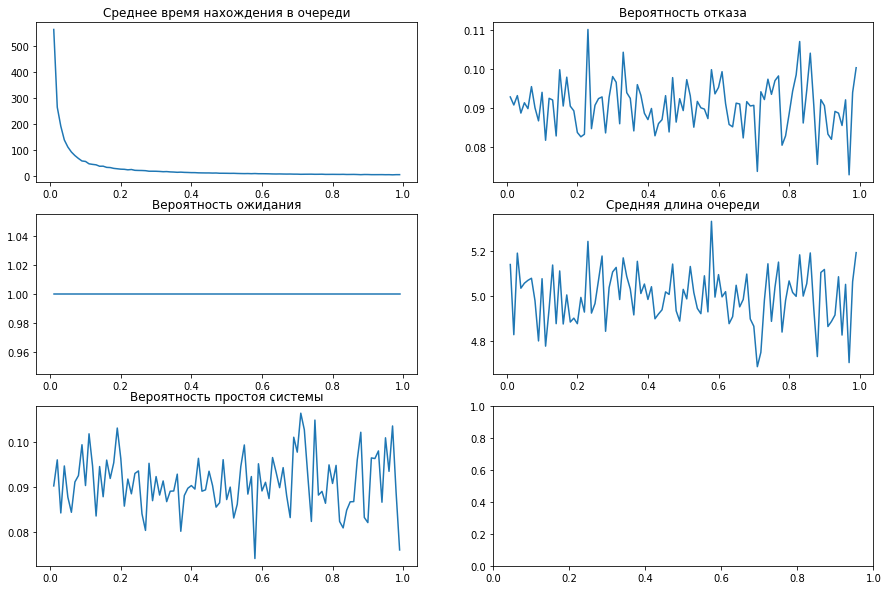

In [29]:
avg_t_t, lost_cust_p, waiting_cust_p, avg_len, wasted_t_p = [], [], [], [], []

parameters = np.arange(0.01, 1, 0.01)
for mu in parameters:
    lmbd = mu
    np.random.seed(int(lmbd*100))
    avg_total_time, lost_customers_prob, waiting_customers_prob, avg_num_in_q, wasted_time_prob = MM1Ksimulation(capacity = 10, lmbd = lmbd, mu = mu, timeout = 0.05)
    avg_t_t.append(avg_total_time)
    lost_cust_p.append(lost_customers_prob)
    waiting_cust_p.append(waiting_customers_prob)
    avg_len.append(avg_num_in_q)
    wasted_t_p.append(wasted_time_prob)

print_metrix(parameters, avg_t_t, lost_cust_p, waiting_cust_p, avg_len, wasted_t_p)

Мемс уменьшением параметров на графе

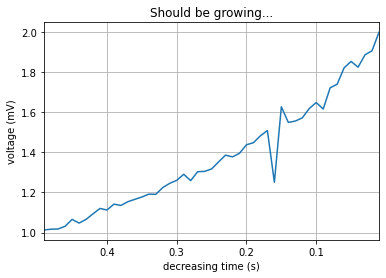

In [57]:
import matplotlib.pyplot as plt
import numpy as np

s = []
mu = 1
t = np.arange(0.01, mu/2, 0.01)
#  УМЕНЬШЕНИЕ lambda все нормас
for lmbd in reversed(parameters):
    np.random.seed(int(lmbd*100))
    avg_total_time, lost_customers_prob, waiting_customers_prob, avg_num_in_q, wasted_time_prob = MM1Ksimulation(capacity = 10, lmbd = lmbd, mu = mu, timeout = 0.05)
    s.append(avg_total_time)

fig, ax = plt.subplots()

ax.plot(t, s)
ax.set_xlim(parameters[-1], parameters[0])  # decreasing time
ax.set_xlabel('decreasing time (s)')
ax.set_ylabel('voltage (mV)')
ax.set_title('Should be growing...')
ax.grid(True)

plt.show()

**lambda<mu**

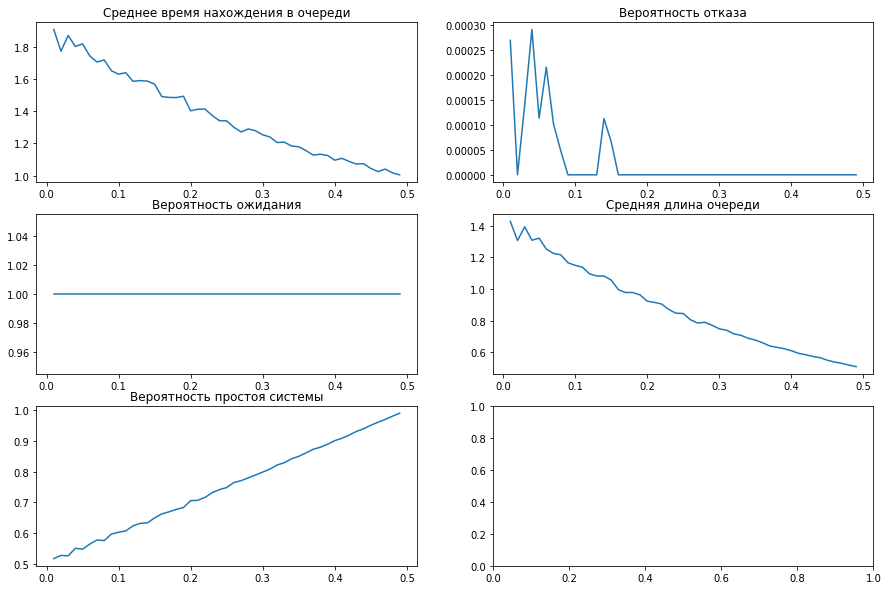

In [33]:
avg_t_t, lost_cust_p, waiting_cust_p, avg_len, wasted_t_p =[], [], [], [], []
mu = 1
parameters = np.arange(0.01, mu/2, 0.01)
#  УМЕНЬШЕНИЕ lambda все нормас
for lmbd in parameters:
    np.random.seed(int(lmbd*100))
    avg_total_time, lost_customers_prob, waiting_customers_prob, avg_num_in_q, wasted_time_prob = MM1Ksimulation(capacity = 10, lmbd = lmbd, mu = mu, timeout = 0.05)
    avg_t_t.append(avg_total_time)
    lost_cust_p.append(lost_customers_prob)
    waiting_cust_p.append(waiting_customers_prob)
    avg_len.append(avg_num_in_q)
    wasted_t_p.append(wasted_time_prob)

print_metrix(parameters, avg_t_t, lost_cust_p, waiting_cust_p, avg_len, wasted_t_p)

**lambda>mu**

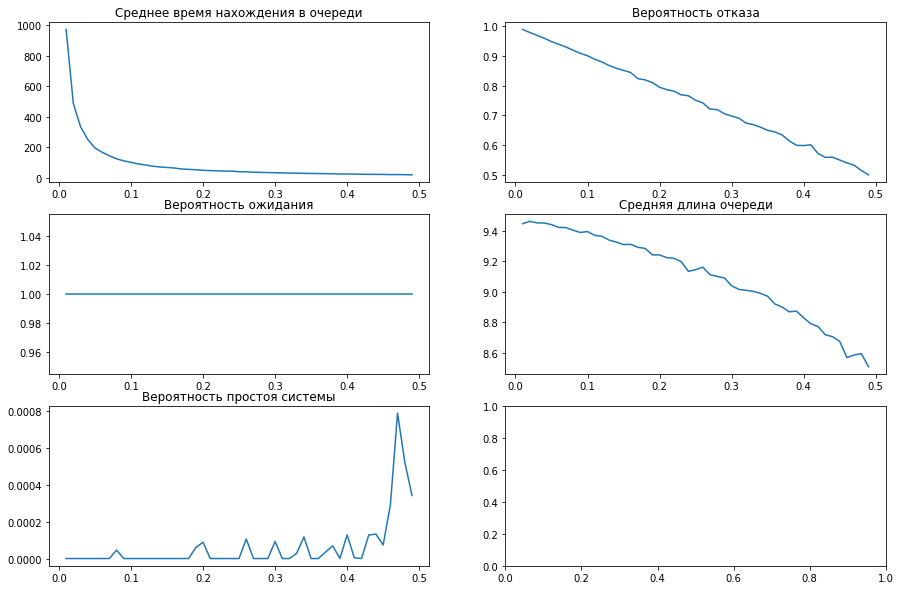

In [31]:
#metrics
avg_t_t,lost_cust_p,waiting_cust_p,avg_len,wasted_t_p =[],[],[],[],[]
lmbd = 1
parameters = np.arange(0.01, lmbd/2, 0.01)
#  УМЕНЬШЕНИЕ mu все нормас
for mu in parameters:
    np.random.seed(int(mu*100))
    avg_total_time, lost_customers_prob, waiting_customers_prob, avg_num_in_q, wasted_time_prob = MM1Ksimulation(10, lmbd, mu, 0.05)
    avg_t_t.append(avg_total_time)
    lost_cust_p.append(lost_customers_prob)
    waiting_cust_p.append(waiting_customers_prob)
    avg_len.append(avg_num_in_q)
    wasted_t_p.append(wasted_time_prob)

print_metrix(parameters, avg_t_t, lost_cust_p, waiting_cust_p, avg_len, wasted_t_p)

**Зафиксируем lambda=5 и mu=2.5 и проведем эксперименты с различными длинами очереди**

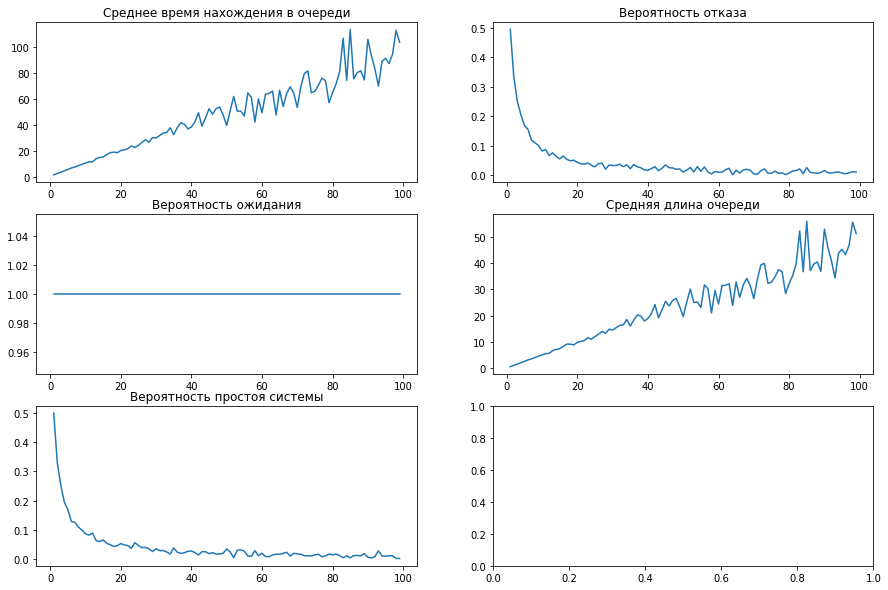

In [32]:
#metrics
avg_t_t,lost_cust_p,waiting_cust_p,avg_len,wasted_t_p =[],[],[],[],[]
capacity = 100
parameters = np.arange(1, capacity, 1)
for cap in parameters:
    np.random.seed(int(cap*100))
    avg_total_time, lost_customers_prob, waiting_customers_prob, avg_num_in_q, wasted_time_prob = MM1Ksimulation(cap, 0.5, 0.5, 0.05)
    avg_t_t.append(avg_total_time)
    lost_cust_p.append(lost_customers_prob)
    waiting_cust_p.append(waiting_customers_prob)
    avg_len.append(avg_num_in_q)
    wasted_t_p.append(wasted_time_prob)
    
print_metrix(parameters, avg_t_t, lost_cust_p, waiting_cust_p, avg_len, wasted_t_p)

# SHIT

In [20]:
def print_some_metrics(_capacity, _lambda, _mu, _timeout):
    avg_total_time,         \
    lost_customers_prob,    \
    waiting_customers_prob, \
    avg_num_in_q,           \
    wasted_time_prob        = MM1Ksimulation(capacity = _capacity, lmbd = _lambda, mu = _mu, timeout = _timeout)
    print("Среднее время пребывания в системе",avg_total_time)
    print("Вероятность ухода посетителя",lost_customers_prob)
    print("Вероятность ожидания", waiting_customers_prob)
    print("Среднее количество людей в очереди",avg_num_in_q)
    print("Вероятность простоя системы",wasted_time_prob)



In [10]:
lambdas = list(np.linspace(0.03, 1, 10))
mus = list(np.linspace(0.03, 1, 10))
capacities = [x for x in range(50, 300, 50)]
timeouts = [x for x in range(1, 20, 3)]
#print(lambdas, mus, capacity, timeouts)
# for capacity in capacities:
#     for timeout in timeouts:
capacity = 50
timeout = 2
for lmbd in lambdas:
    for mu in mus:
        print(f"Lambda = {lmbd}, Mu = {mu}, capacity = {capacity}, timeout = {timeout}\n")
        print_some_metrics(capacity, lmbd, mu, timeout)
        print()


Lambda = 0.03, Mu = 0.03, capacity = 50, timeout = 2

145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
274
275
276
277
278
279
280
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
63

In [ ]:
def exp_avg_total_time(l, m, n):
    r = l/m
    p0 = (1-r)/(1-r**(n+2))
    L_ob = 1-p0
    L_och = (r**2)*(1-(r**n)*(n+1-n*r))/(1-r**(n+2))/(1-r)
    L_smo = L_och + L_ob
    absolut = l*(1-r**(n+1)*p0)
    avg_t_t = L_smo/absolut
    return avg_t_t 